# Pandas

Pandas ayuda en el análisis y modelado de datos. 
<ul type="square" style="color:blue">
<li>Posee herramientas para leer y escribir datos entre estructuras de datos en memoria y diferentes formatos: CSV y archivos de texto(.txt), Microsoft Excel(.xls, .xlsx), json, HTML, clipboard, bases de datos SQL y el formato rápido HDF5
<li> Fácil manejo de datos faltantes (representados como NaN) en punto flotante así como datos de punto no flotante
<li> Facilite la conversión de datos irregulares e indexados de manera diferente en otras estructuras de datos de Python y NumPy en objetos DataFrame
<li> Alineación inteligente de datos y manejo integrado de datos faltantes
<li> Las columnas se pueden insertar y eliminar de las estructuras de datos (mutabilidad de tamaño)
<li> Funcionalidad de series de tiempo: generación de rango de fecha y conversión de frecuencia, estadísticas de ventana móvil, regresiones lineales de ventana móvil, desplazamiento de fecha y retraso. Incluso puede crear compensaciones de tiempo específicas del dominio y unirse a series de tiempo sin perder datos;
</ul>
Con Pandas, podemos realizar cinco pasos típicos en el procesamiento y análisis de datos, independientemente del origen de los datos: cargar, preparar, manipular, modelar y analizar.

<img src="grafico_pandas.png"  />

In [1]:
import pandas as pd

In [2]:
numeros = [1,2,3,4]
pd.Series(numeros)

0    1
1    2
2    3
3    4
dtype: int64

Se de tener en cuenta que cuando vea NAN, su significado es similar a None, pero es un valor numérico y se trata de manera diferente por razones de eficiencia.

In [3]:
import numpy as np
np.nan==None

False

##  <font color='gray'>Series</font>

Podemos pensar en las series como un cruce entre las listas y los diccionarios

In [4]:
#pd.Series?

In [5]:
ds_mascotas = {'Luis': 'Bobby',
            'Carmen': 'Kitty',
            'Rosaura': 'Chester',
            'Armando': 'Rocco'}
ds_m = pd.Series(ds_mascotas)
ds_m

Luis         Bobby
Carmen       Kitty
Rosaura    Chester
Armando      Rocco
dtype: object

In [6]:
print(type(ds_mascotas))
print(type(ds_m))

<class 'dict'>
<class 'pandas.core.series.Series'>


Los valores se guardan en <i>values</i> y los índices en <i>index</i>

In [7]:
ds_m.values

array(['Bobby', 'Kitty', 'Chester', 'Rocco'], dtype=object)

In [8]:
ds_m.index

Index(['Luis', 'Carmen', 'Rosaura', 'Armando'], dtype='object')

Otra forma de crear una serie es la siguiente:

In [9]:
ds_documentos = pd.Series(['RR 03500-R-12','RR 08655-R-18','RR 03013-R-16','RR 08455-R-18'],
                       index=['Resoluciones', 'ROF','Estatuto','Directivas'])
ds_documentos

Resoluciones    RR 03500-R-12
ROF             RR 08655-R-18
Estatuto        RR 03013-R-16
Directivas      RR 08455-R-18
dtype: object

In [10]:
ds_documentos['Resoluciones']

'RR 03500-R-12'

### Consultas

Para consultar por ubicación numérica, comenzando desde cero se usa __iloc__ . Para consultar por el índice podemos usar __loc__ . Tener en cuenta que iloc y loc no son métodos, son atributos. Así que no usan paréntesis para consultarlos, sino corchetes, que reciben el nombre de operador de indexación.

In [11]:
culturas = {'México':'Azteca',
           'Perú':'Caral',
           'Colombia':'Zenú',
           'Egipto':'Egipcia'}
ds_culturas = pd.Series(culturas)
ds_culturas

México       Azteca
Perú          Caral
Colombia       Zenú
Egipto      Egipcia
dtype: object

In [12]:
ds_culturas.iloc[0]

'Azteca'

In [13]:
ds_culturas.loc['Colombia']

'Zenú'

En el ejemplo anterior si realizamos la consulta sin el uso de <i>iloc</i> y <i>loc</i> obtendremo los mismos resultados. Pero si el parámetro es un número entero, entonces pandas no sabrá como ejecutarlo, pues no sabrá si nos referimos al índice o al valor

In [14]:
culturas = {52:'Azteca',
           51:'Caral',
           57:'Zenú',
           20:'Egipcia'}
ds_culturas = pd.Series(culturas)
ds_culturas

52     Azteca
51      Caral
57       Zenú
20    Egipcia
dtype: object

In [15]:
#ds_culturas[0]

Para evitar este problema es preferible usar <i>iloc</i> o <i>loc</i>

Si bien es importante estar al tanto de la escritura debajo, Pandas cambiará automáticamente los tipos de NumPy subyacentes según sea apropiado.

In [16]:
ds = pd.Series([1, 2, 3])
ds

0    1
1    2
2    3
dtype: int64

In [17]:
ds.loc[8] = 'américa'
ds

0          1
1          2
2          3
8    américa
dtype: object

Cuando queremos realizar una serie que posea varios indices iguales, debemos tener en cuenta el siguiente comportamiento

In [18]:
culturas = {'México':'Azteca',
           'Perú':'Caral',
           'Colombia':'Zenú',
           'Egipto':'Egipcia',
           'México':'Mazahua',
           'Colombia':'Muisca'}
ds_culturas = pd.Series(culturas)
ds_culturas

México      Mazahua
Perú          Caral
Colombia     Muisca
Egipto      Egipcia
dtype: object

In [19]:
ds_culturas['México']

'Mazahua'

In [20]:
ds_culturas = pd.Series(['Azteca','Caral','Zenú','Egipcia','Mazahua','Muisca'], 
                     index=['México','Perú','Colombia','Egipto','México','Colombia'])
ds_culturas

México       Azteca
Perú          Caral
Colombia       Zenú
Egipto      Egipcia
México      Mazahua
Colombia     Muisca
dtype: object

In [21]:
ds_culturas['México']

México     Azteca
México    Mazahua
dtype: object

## <font color='gray'>DataFrames</font>

Es un objeto bidimensional, donde hay un índice y varias columnas de contenido.
<br>Se puede crear un DataFrame de muchas maneras diferentes. Por ejemplo se puede usar un grupo de series, donde cada serie representa una fila de datos, o se podría usar un grupo de diccionarios, donde cada diccionario representa una fila de datos.

In [22]:
alumno_1 = pd.Series({'Código de Estudiante': '15520012',
                      'Nombre': 'Ivana',
                      'Edad': 22})
alumno_2 = pd.Series({'Código de Estudiante': '15520814',
                      'Nombre': 'Lorena',
                      'Edad': 24})
alumno_3 = pd.Series({'Código de Estudiante': '16520113',
                      'Nombre': 'Jorge',
                      'Edad': 26})
alumno_4 = pd.Series({'Código de Estudiante': '14520087',
                      'Nombre': 'Claudio',
                      'Edad': 21})
df_astronomia= pd.DataFrame([alumno_1, alumno_2, alumno_3,alumno_4], index=[1,2,3,4])
df_astronomia

,Código de Estudiante,Nombre,Edad
1,15520012,Ivana,22
2,15520814,Lorena,24
3,16520113,Jorge,26
4,14520087,Claudio,21


Si no se asignan índices, entonces se asignarán índices por defecto.
<br>Podemos también ordenar las columnas como deseemos

In [23]:
datos={'Código de Estudiante':['15520012','15520814','16520113','14520087'],
      'Nombre':['Ivana','Lorena','Jorge','Claudio'],
      'Edad':[22,24,26,21]}
df_astronomia=pd.DataFrame(datos, columns=['Edad', 'Nombre', 'Código de Estudiante'])
df_astronomia

,Edad,Nombre,Código de Estudiante
0,22,Ivana,15520012
1,24,Lorena,15520814
2,26,Jorge,16520113
3,21,Claudio,14520087


Otra forma de crear un DataFrame es la siguiente:

In [24]:
datos = [['15520012','Ivana',22],['15520814','Lorena',24],['16520113','Jorge',26],['14520087','Claudio',21]]
df_astronomia = pd.DataFrame(datos,columns=['Código de Estudiante','Nombre','Edad'])
df_astronomia

,Código de Estudiante,Nombre,Edad
0,15520012,Ivana,22
1,15520814,Lorena,24
2,16520113,Jorge,26
3,14520087,Claudio,21


In [25]:
df_astronomia.shape

(4, 3)

Para llamar a una columna podemos usar __['Nombre']__ o __.Nombre__

In [26]:
df_astronomia['Nombre']
#df_astronomia.Nombre

0      Ivana
1     Lorena
2      Jorge
3    Claudio
Name: Nombre, dtype: object

De manera similar a la serie, podemos extraer datos usando los atributos __iloc__ y __loc__ . Debido a que el DataFrame es bidimensional, pasar un solo valor al operador de indexación loc devolverá una serie si solo hay una fila para devolver.

In [27]:
df_astronomia.loc[1]

Código de Estudiante    15520814
Nombre                    Lorena
Edad                          24
Name: 1, dtype: object

Dado que el resultado de usar los operadores de indexación (DataFrame o series) pueden encadenar operaciones, podemos hacer la siguiente consulta

In [28]:
df_astronomia.loc[3]['Nombre']

'Claudio'

#### Agregar columnas

In [29]:
#Agregaremos una columna con las notas de la primera práctica
df_astronomia['Práctica 1']=[8,11,12,11]

In [30]:
df_astronomia

,Código de Estudiante,Nombre,Edad,Práctica 1
0,15520012,Ivana,22,8
1,15520814,Lorena,24,11
2,16520113,Jorge,26,12
3,14520087,Claudio,21,11


In [31]:
#df_astronomia.drop?

#### Eliminar datos

In [32]:
df_astronomia.drop('Edad',axis=1)

,Código de Estudiante,Nombre,Práctica 1
0,15520012,Ivana,8
1,15520814,Lorena,11
2,16520113,Jorge,12
3,14520087,Claudio,11


La función drop no cambia el DataFrame por defecto, devuelve una copia del DataFrame con las filas dadas eliminadas.

In [33]:
df_astronomia

,Código de Estudiante,Nombre,Edad,Práctica 1
0,15520012,Ivana,22,8
1,15520814,Lorena,24,11
2,16520113,Jorge,26,12
3,14520087,Claudio,21,11


Para poder trabajar con los datos eliminados, usualmente se asigna a una nueva variable usando __copy__ y eliminando los datos que no usaremos

In [34]:
copia_df_astronomia = df_astronomia.copy()
copia_df_astronomia = copia_df_astronomia.drop('Edad',axis=1)
copia_df_astronomia

,Código de Estudiante,Nombre,Práctica 1
0,15520012,Ivana,8
1,15520814,Lorena,11
2,16520113,Jorge,12
3,14520087,Claudio,11


__¿Por qué usar copy?__
<br>__Cuando asignamos un subconjunto en otra variable, los cambios que hagamos en esta nueva variable afectarán a nuestros datos iniciales__

In [35]:
df_astronomia_notas=df_astronomia.loc[:2]
df_astronomia_notas

,Código de Estudiante,Nombre,Edad,Práctica 1
0,15520012,Ivana,22,8
1,15520814,Lorena,24,11
2,16520113,Jorge,26,12


In [36]:
df_astronomia_notas['Práctica 1']=[5,5,5]
df_astronomia_notas

C:\Users\Sistema\Anaconda3\envs\Ambiente\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Código de Estudiante,Nombre,Edad,Práctica 1
0,15520012,Ivana,22,5
1,15520814,Lorena,24,5
2,16520113,Jorge,26,5


In [37]:
df_astronomia

,Código de Estudiante,Nombre,Edad,Práctica 1
0,15520012,Ivana,22,5
1,15520814,Lorena,24,5
2,16520113,Jorge,26,5
3,14520087,Claudio,21,11


### Observación

In [38]:
#Los siguientes producen resultados diferentes:
df_astronomia_notas=df_astronomia.loc[:2,['Práctica 1']]
#df_astronomia_notas=df_astronomia.loc[:2]['Práctica 1']
#df_astronomia_notas=df_astronomia[:2]['Práctica 1']
df_astronomia_notas

,Práctica 1
0,5
1,5
2,5


## Lectura de Archivos

Para leer los diferentes tipos de archivos usamos los siguientes comandos:
<table style="width: 30%" align="left">
   <tr>
      <th>Formato</th>
      <th>Llamado</th>
   </tr>
   <tr>
      <td>txt,csv</td>
      <td>read_table, read_csv</td>
   </tr>
   <tr>
      <td>pickle</td>
      <td>read_pickle</td>
   </tr>
   <tr>
      <td>HDF5</td>
      <td>read_hdf, HDFStore</td>
   </tr>
   <tr>
      <td>SQL</td>
      <td>read_sql_table</td>
   </tr>
   <tr>
      <td>Excel</td>
      <td>read_excel</td>
   </tr>
v</table>

In [39]:
#pd.read_excel?

Ahora llamaremos una tabla que contiene el medalleros de los juegos olimpicos. donde 1! son las medallas de oro, 2! las de plata y 3! las de bronce

In [40]:
df = pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


## Indexación

In [41]:
df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [42]:
df.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [43]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Oro' + col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Plata' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronce' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

df.head()

,# Summer,Oro,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Consultas en Dataframes

La búsqueda en Dataframes tiene su base en el enmascaramiento booleano. Las máscaras booleanas se crean aplicando operadores directamente a la serie de pandas o Objetos DataFrame.

Por ejemplo, en nuestro conjunto de datos de los Juegos Olímpicos, es posible que estemos interesados en ver solo aquellos países que han logrado una medalla de oro en los Juegos Olímpicos de verano. Para construir una máscara booleana para esta consulta, proyectamos la columna de oro usando el operador de indexación y aplicamos el operador "mayor que" con un valor de comparación de cero.

In [44]:
df['Oro'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

Lo que queremos hacer a continuación es superponer esa máscara en el DataFrame. Podemos hacer esto usando la función where. La función where toma una máscara booleana como condición, la aplica al marco de datos o serie, y devuelve un nuevo marco de datos o serie de la misma forma.

In [45]:
solo_oro = df.where(df['Oro'] > 0)
solo_oro.head()

,# Summer,Oro,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


Todos los países que no cumplieron con la condición tienen datos de NaN en su lugar. Esto está bien. La mayoría de las funciones estadísticas integradas en el objeto de marco de datos ignoran los valores de NaN.

In [46]:
solo_oro['Oro'].count()

100

In [47]:
df['Oro'].count()

147

Una forma es eliminar loa valores perdidos, para ello usamos __dropna__

In [48]:
solo_oro = solo_oro.dropna()
solo_oro.head()

,# Summer,Oro,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0
Australia (AUS) [AUS] [Z],25.0,139.0,152.0,177.0,468.0,18.0,5.0,3.0,4.0,12.0,43.0,144.0,155.0,181.0,480.0


No tenemos que usar explícitamente la función where. Pandas permiten que operador de indexación tome una máscara booleana como un valor en lugar de solo una lista de nombres de columnas.

In [49]:
solo_oro = df[df['Oro'] > 0]
solo_oro.head()

,# Summer,Oro,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


La salida de dos máscaras booleanas se compara con operadores lógicos Es otra máscara booleana. Esto significa que puede encadenar un montón de declaraciones y / o para crear consultas más complejas, y el resultado es una única máscara booleana.

In [50]:
len(df[(df['Oro'] > 0) | (df['Oro.1'] > 0)])

101

In [51]:
df[(df['Oro.1'] > 0) & (df['Oro'] == 0)]

,# Summer,Oro,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


## Reindexación

Digamos que no queremos indexar el DataFrame por países, pero En su lugar, desea indexar por el número de medallas de oro que se ganaron en los juegos de verano. Primero necesitamos preservar la información del país en una nueva columna. Podemos hacer esto usando el operador de indexación o la cadena que tiene la etiqueta de columna. Luego, podemos usar set_index para establecer el índice de la columna para ganar la medalla de oro de verano.

In [52]:
df['pais'] = df.index
df = df.set_index('Oro')
df.head()

,# Summer,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total,pais
Oro,,,,,,,,,,,,,,,
0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


In [53]:
df = df.reset_index()
df.head()

,Oro,# Summer,Plata,Bronce,Total,# Winter,Oro.1,Plata.1,Bronce.1,Total.1,# Games,Oro.2,Plata.2,Bronce.2,Combined total,pais
0,0,13,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan (AFG)
1,5,12,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria (ALG)
2,18,23,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina (ARG)
3,1,5,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia (ARM)
4,3,2,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia (ANZ) [ANZ]


También se pueden hacer indexaciones multinivel. Para ello usaremos census.csv este conjunto de datos contiene datos de población de los condados y estados de los EE. UU. De 2010 a 2015, la descripción de las variables se encuentran en este [enlace](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf)

In [54]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [55]:
df['SUMLEV'].unique()

array([40, 50], dtype=int64)

Vamos a deshacernos de todas las filas que son resúmenes a nivel de estado y sólo mantén los datos del condado

In [56]:
df=df[df['SUMLEV'] == 50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [57]:
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


Y nos centraremos solo en determinadas columnas

In [58]:
columnas_a_usar = ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df = df[columnas_a_usar]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [59]:
df = df.set_index(['STNAME', 'CTYNAME'])
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   
        Blount County          183         744         710         646   

                        BIRTHS2014  BIRTHS2015  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Autauga County         623         600            54660   
        Baldwin County        2186        2240           183193   
        Barbour County         260         269            27341   
        Bibb County            247         253            22861   
        Blount County          618         603            57373   

                        POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
STNAME  CTYNAME                                                             
Alabama Autauga County            55253            55175            55038   
        Baldwin County           186659           190396           195126   
        Barbour County            27226            27159            26973   
        Bibb County               22733            22642            22512   
        Blount County             57711            57776            57734   

                        POPESTIMATE2014  POPESTIMATE2015  
STNAME  CTYNAME                                           
Alabama Autauga County            55290            55347  
        Baldwin County           199713           203709  
        Barbour County            26815            26489  
        Bibb County               22549            22583  
        Blount County             57658            57673

Para realizar consultas en un MultiIndex, debemos proporcionar los argumentos en orden, por el nivel que se desea consultar. Dentro del índice, cada columna se llama nivel y la columna más externa es el nivel cero

In [60]:
df.loc['Michigan', 'Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

## Fusionado

A menudo encontraremos que los datos que necesitamos no están en un solo archivo, sino que se encuentran en varios archivos de texto, hojas de cálculo o bases de datos.

In [61]:
personal_df = pd.DataFrame([{'Nombre': 'Kelly', 'Puesto': 'Director'},
                         {'Nombre': 'Sally', 'Puesto': 'Psicologo'},
                         {'Nombre': 'Julio', 'Puesto': 'Supervisor'}])
personal_df = personal_df.set_index('Nombre')
estudios_df = pd.DataFrame([{'Nombre': 'Julio', 'Carrera': 'Finanzas'},
                           {'Nombre': 'Miguel', 'Carrera': 'Psicologia'},
                           {'Nombre': 'Sally', 'Carrera': 'Ingenieria'}])
estudios_df = estudios_df.set_index('Nombre')
print(personal_df.head())
print()
print(estudios_df.head())

            Puesto
Nombre            
Kelly     Director
Sally    Psicologo
Julio   Supervisor

           Carrera
Nombre            
Julio     Finanzas
Miguel  Psicologia
Sally   Ingenieria


In [62]:
pd.merge(personal_df, estudios_df, how='outer', left_index=True, right_index=True)

,Puesto,Carrera
Nombre,,
Julio,Supervisor,Finanzas
Kelly,Director,NaN
Miguel,NaN,Psicologia
Sally,Psicologo,Ingenieria


In [63]:
pd.merge(personal_df, estudios_df, how='inner', left_index=True, right_index=True)

,Puesto,Carrera
Nombre,,
Sally,Psicologo,Ingenieria
Julio,Supervisor,Finanzas


In [64]:
pd.merge(personal_df, estudios_df, how='left', left_index=True, right_index=True)

,Puesto,Carrera
Nombre,,
Kelly,Director,NaN
Sally,Psicologo,Ingenieria
Julio,Supervisor,Finanzas


In [65]:
pd.merge(personal_df, estudios_df, how='right', left_index=True, right_index=True)

,Puesto,Carrera
Nombre,,
Julio,Supervisor,Finanzas
Miguel,NaN,Psicologia
Sally,Psicologo,Ingenieria


In [66]:
personal_df = personal_df.reset_index()
estudios_df = estudios_df.reset_index()
pd.merge(personal_df, estudios_df, how='left', left_on='Nombre', right_on='Nombre')

,Nombre,Puesto,Carrera
0,Kelly,Director,NaN
1,Sally,Psicologo,Ingenieria
2,Julio,Supervisor,Finanzas


In [67]:
personal_df = pd.DataFrame([{'Nombre': 'Kelly', 'Puesto': 'Director','Condición':'Activo'},
                         {'Nombre': 'Sally', 'Puesto': 'Psicologo','Condición':'Activo'},
                         {'Nombre': 'Julio', 'Puesto': 'Supervisor','Condición':'Inactivo'}])
estudios_df = pd.DataFrame([{'Nombre': 'Julio', 'Carrera': 'Finanzas','Condición':'Doctor'},
                           {'Nombre': 'Miguel', 'Carrera': 'Psicologia','Condición':'Licenciado'},
                           {'Nombre': 'Sally', 'Carrera': 'Ingenieria','Condición':'Magister'}])
pd.merge(personal_df, estudios_df, how='left', left_on='Nombre', right_on='Nombre')

,Condición_x,Nombre,Puesto,Carrera,Condición_y
0,Activo,Kelly,Director,NaN,NaN
1,Activo,Sally,Psicologo,Ingenieria,Magister
2,Inactivo,Julio,Supervisor,Finanzas,Doctor


In [68]:
personal_df = pd.DataFrame([{'Nombre': 'Kelly', 'Apellido': 'Martinez', 'Puesto': 'Director'},
                         {'Nombre': 'Sally', 'Apellido': 'Egoavil', 'Puesto': 'Psicologo'},
                         {'Nombre': 'Julio', 'Apellido': 'Rodriguez', 'Puesto': 'Supervisor'}])
estudios_df = pd.DataFrame([{'Nombre': 'Julio', 'Apellido': 'Fabian', 'Carrera': 'Finanzas'},
                           {'Nombre': 'Miguel', 'Apellido': 'Lopez', 'Carrera': 'Psicologia'},
                           {'Nombre': 'Sally', 'Apellido': 'Egoavil', 'Carrera': 'Ingenieria'}])
pd.merge(personal_df, estudios_df, how='inner', left_on=['Nombre','Apellido'], right_on=['Nombre','Apellido'])

,Apellido,Nombre,Puesto,Carrera
0,Egoavil,Sally,Psicologo,Ingenieria


## Group by

In [69]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [70]:
%%timeit -n 10
for estado in df['STNAME'].unique():
    promedio = np.average(df.where(df['STNAME']==estado).dropna()['CENSUS2010POP'])
    print('Los condados en el estado ' + estado + ' tienen una población media de ' + str(promedio))

Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado 

Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en

Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en

Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en

Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en

Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados 

Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en e

Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados e

Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en 

Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en 

Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en 

Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en 

Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condad

Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
L

Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.102564102

Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los

Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.7857142857

Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1

Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.

Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.

Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los c

Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados 

Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condad

Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el e

Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condado

Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Je

Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado Ne

Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Ne

Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebras

Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estad

Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mis

Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tiene

Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mis

Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michiga

Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michiga

Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts 

In [71]:
%%timeit -n 10
for grupo, cuadro in df.groupby('STNAME'):
    promedio = np.average(cuadro['CENSUS2010POP'])
    print('Los condados en el estado ' + grupo + ' tienen una población media de ' + str(promedio))

Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado 

Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tie

Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebraska tienen una población media de 19638.075268817203
Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condado

Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentucky tienen una población media de 36161.39166666667
Los condados en el estado Louisiana tienen una población media de 70833.9375
Los condados en el estado Maine tienen una población media de 83022.5625
Los condados en el estado Maryland tienen una población media de 240564.66666666666
Los condados en el estado Massachusetts tienen una población media de 467687.78571428574
Los condados en el estado Michigan tienen una población media de 119080.0
Los condados en el estado Minnesota tienen una población media de 60964.65517241379
Los condados en el estado Mississippi tienen una población media de 36186.54878048781
Los condados en el estado Missouri tienen una población media de 52077.62608695652
Los condados en el estado Montana tienen una población media de 17668.125
Los condados en el estado Nebras

Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en e

Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434

Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado 

Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en e

Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en e

Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los condados en el estado Alabama tienen una población media de 71339.34328358209
Los condados en el estado Alaska tienen una población media de 24490.724137931036
Los condados en el estado Arizona tienen una población media de 426134.4666666667
Los condados en el estado Arkansas tienen una población media de 38878.90666666667
Los condados en el estado California tienen una población media de 642309.5862068966
Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en

Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1

Los condados en el estado Rhode Island tienen una población media de 210513.4
Los condados en el estado South Carolina tienen una población media de 100551.39130434782
Los condados en el estado South Dakota tienen una población media de 12336.060606060606
Los condados en el estado Tennessee tienen una población media de 66801.1052631579
Los condados en el estado Texas tienen una población media de 98998.27165354331
Los condados en el estado Utah tienen una población media de 95306.37931034483
Los condados en el estado Vermont tienen una población media de 44695.78571428572
Los condados en el estado Virginia tienen una población media de 60111.29323308271
Los condados en el estado Washington tienen una población media de 172424.10256410256
Los condados en el estado West Virginia tienen una población media de 33690.8
Los condados en el estado Wisconsin tienen una población media de 78985.91666666667
Los condados en el estado Wyoming tienen una población media de 24505.478260869564
Los co

Los condados en el estado Colorado tienen una población media de 78581.1875
Los condados en el estado Connecticut tienen una población media de 446762.125
Los condados en el estado Delaware tienen una población media de 299311.3333333333
Los condados en el estado District of Columbia tienen una población media de 601723.0
Los condados en el estado Florida tienen una población media de 280616.5671641791
Los condados en el estado Georgia tienen una población media de 60928.63522012578
Los condados en el estado Hawaii tienen una población media de 272060.2
Los condados en el estado Idaho tienen una población media de 35626.86363636364
Los condados en el estado Illinois tienen una población media de 125790.50980392157
Los condados en el estado Indiana tienen una población media de 70476.10869565218
Los condados en el estado Iowa tienen una población media de 30771.262626262625
Los condados en el estado Kansas tienen una población media de 27172.55238095238
Los condados en el estado Kentuck

Los condados en el estado Nevada tienen una población media de 158855.9411764706
Los condados en el estado New Hampshire tienen una población media de 131647.0
Los condados en el estado New Jersey tienen una población media de 418661.61904761905
Los condados en el estado New Mexico tienen una población media de 62399.36363636364
Los condados en el estado New York tienen una población media de 312550.03225806454
Los condados en el estado North Carolina tienen una población media de 95354.83
Los condados en el estado North Dakota tienen una población media de 12690.396226415094
Los condados en el estado Ohio tienen una población media de 131096.63636363635
Los condados en el estado Oklahoma tienen una población media de 48718.844155844155
Los condados en el estado Oregon tienen una población media de 106418.72222222222
Los condados en el estado Pennsylvania tienen una población media de 189587.74626865672
Los condados en el estado Rhode Island tienen una población media de 210513.4
Los c

In [72]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [73]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [74]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [75]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

C:\Users\Sistema\Anaconda3\envs\Ambiente\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

## Fecha y Hora

In [76]:
pd.Timestamp('5/4/2018 10:05AM')

Timestamp('2018-05-04 10:05:00')

In [77]:
pd.Period('1/2018')

Period('2018-01', 'M')

In [78]:
pd.Period('3/5/2018')

Period('2018-03-05', 'D')

In [79]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2018-09-01'), pd.Timestamp('2018-09-02'), pd.Timestamp('2018-09-03')])
t1

2018-09-01    a
2018-09-02    b
2018-09-03    c
dtype: object

In [80]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [81]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [82]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

Pandas acepta varias formas de escribir las fechas

In [83]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,45,64
"Aug 29, 2014",16,33
2015-06-26,22,30
7/12/16,43,22


In [84]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,45,64
2014-08-29,16,33
2015-06-26,22,30
2016-07-12,43,22


In [85]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

Intervalos de tiempo

In [86]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [87]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Trabajando dataframe con fechas

In [88]:
fechas = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
fechas

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [89]:
df = pd.DataFrame({'Conteo 1': 100 + np.random.randint(-5, 10, 9),
                  'Conteo 2': 120 + np.random.randint(-5, 10, 9)}, index=fechas)
df

,Conteo 1,Conteo 2
2016-10-02,99,117
2016-10-16,106,125
2016-10-30,102,122
2016-11-13,108,121
2016-11-27,98,115
2016-12-11,103,120
2016-12-25,100,118
2017-01-08,97,118
2017-01-22,109,129


In [90]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [91]:
df.diff()

,Conteo 1,Conteo 2
2016-10-02,NaN,NaN
2016-10-16,7.0,8.0
2016-10-30,-4.0,-3.0
2016-11-13,6.0,-1.0
2016-11-27,-10.0,-6.0
2016-12-11,5.0,5.0
2016-12-25,-3.0,-2.0
2017-01-08,-3.0,0.0
2017-01-22,12.0,11.0


In [92]:
df.resample('M').mean()

,Conteo 1,Conteo 2
2016-10-31,102.333333,121.333333
2016-11-30,103.000000,118.000000
2016-12-31,101.500000,119.000000
2017-01-31,103.000000,123.500000


In [93]:
df.asfreq('W', method='ffill')

,Conteo 1,Conteo 2
2016-10-02,99,117
2016-10-09,99,117
2016-10-16,106,125
2016-10-23,106,125
2016-10-30,102,122
2016-11-06,102,122
2016-11-13,108,121
2016-11-20,108,121
2016-11-27,98,115
2016-12-04,98,115


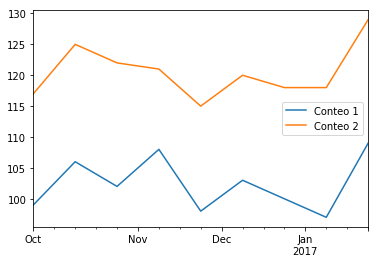

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()

### Referencias

https://pandas.pydata.org/
<br>https://github.com/jonathanrocher/pandas_tutorial/blob/master/analyzing_and_manipulating_data_with_pandas_manual.pdf
<br>https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf